***Assignment 4***

## **SMS SPAM Classification**

### **1. Import the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, pad_sequences
from keras.optimizers import RMSprop

### **2. Download and read the Dataset**

In [2]:
df=pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.shape

(5572, 2)

### **3. Do Pre-processing**

Text(0.5, 1.0, 'Number of ham spam messages')

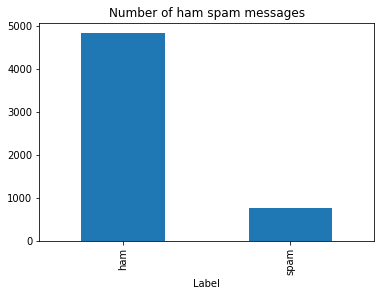

In [6]:
df['v1'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.title('Number of ham spam messages')

In [7]:
X=df.v2
Y=df.v1
#label encoding for Y
le = LabelEncoder()
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)

In [8]:
#split into train and test datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [9]:
#Tokenizer
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = keras.utils.pad_sequences(sequences,maxlen=max_len)

### **4. Add Layers(LSTM, Dense-(Hidden Layers), Output)**

In [10]:
inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(64)(layer)
layer = Dense(256,name='FC1')(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1,name='out_layer')(layer)
layer = Activation('sigmoid')(layer)

### **5. Create the Model**

In [11]:
model = Model(inputs=inputs,outputs=layer)

### **6. Compile the Model**

In [12]:
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

### **7. Fit the Model**

In [13]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 30s 772ms/step - loss: 0.3246 - accuracy: 0.8741 - val_loss: 0.1500 - val_accuracy: 0.9765
Epoch 2/10
28/28 [==============================] - 16s 564ms/step - loss: 0.0846 - accuracy: 0.9795 - val_loss: 0.0519 - val_accuracy: 0.9798
Epoch 3/10
28/28 [==============================] - 8s 282ms/step - loss: 0.0598 - accuracy: 0.9820 - val_loss: 0.0457 - val_accuracy: 0.9854
Epoch 4/10
28/28 [==============================] - 8s 278ms/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.0459 - val_accuracy: 0.9832
Epoch 5/10
28/28 [==============================] - 8s 281ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0556 - val_accuracy: 0.9787
Epoch 6/10
28/28 [==============================] - 8s 279ms/step - loss: 0.0252 - accuracy: 0.9938 - val_loss: 0.0814 - val_accuracy: 0.9686
Epoch 7/10
28/28 [==============================] - 8s 279ms/step - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0565 - val_accuracy: 0.9865
Epoc

### **8. Save the Model**

In [14]:
model.save('spam_lstm_model.h5')

### **9. Test the Model**

In [15]:
#processing test data
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = keras.utils.pad_sequences(test_sequences,maxlen=max_len)

In [16]:
#evaluation of our model
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

35/35 [==============================] - 1s 24ms/step - loss: 0.0490 - accuracy: 0.9865
Test set
  Loss: 0.049
  Accuracy: 0.987
